In [1]:
import pandas as pd

# Load the XOR dataset from the uploaded file
file_path = './Xor_Dataset.csv'
xor_data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
xor_data.head()

,X,Y,Z
0,0,0,0
1,0,1,1
2,1,1,0
3,1,1,0
4,0,0,0


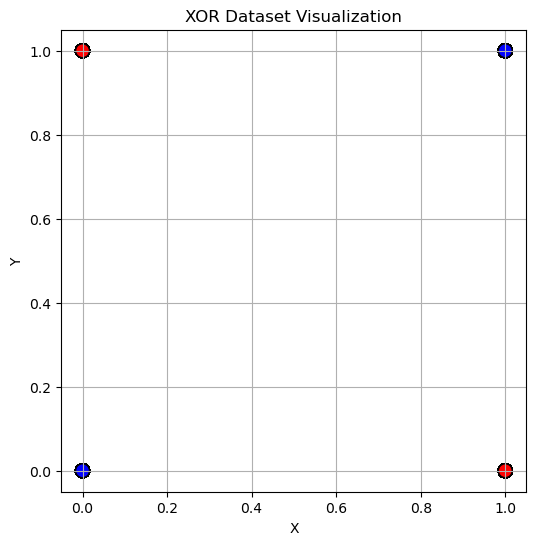

In [2]:
import matplotlib.pyplot as plt


# Visualize the XOR dataset
plt.figure(figsize=(6, 6))
colors = ['red' if z == 1 else 'blue' for z in xor_data['Z']]
plt.scatter(xor_data['X'], xor_data['Y'], c=colors, edgecolor='k', s=100)
plt.title('XOR Dataset Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Prepare the data for training and testing
X = xor_data[['X', 'Y']]
y = xor_data['Z']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a minimal neural network
# One hidden layer with 2 neurons (smallest sufficient network for XOR)
model = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
accuracy, model.coefs_, model.intercepts_

(0.5145,
 [array([[-0.00257431,  0.93248832],
         [ 0.05914736,  0.04023378]]),
  array([[-0.52196784],
         [ 0.9020346 ]])],
 [array([-0.84257881, -1.01416022]), array([0.01312898])])

In [5]:
# Increase the number of neurons to 4 in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=1000, random_state=42)

# Train the updated model
model.fit(X_train, y_train)

# Test the updated model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the updated results
accuracy, model.coefs_, model.intercepts_

(0.497,
 [array([[-3.70265416e-08,  4.82371946e-01,  2.98206501e-04,
          -2.52078046e-01],
         [-9.18380911e-03, -1.22876173e-01, -4.16954474e-02,
           2.93693607e-01]]),
  array([[ 0.58519405],
         [-0.15152189],
         [-0.01005644],
         [-0.2486494 ]])],
 [array([-0.01000432,  0.12598318, -0.95883101,  0.48912027]),
  array([0.17368075])])

In [6]:
# Try a network with 2 hidden layers, each with 2 neurons
model = MLPClassifier(hidden_layer_sizes=(2, 2), activation='relu', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the updated results
accuracy, model.coefs_, model.intercepts_

(0.764,
 [array([[-1.68223048e-30,  1.51215205e+00],
         [ 4.78762520e-14,  1.51084932e+00]]),
  array([[-9.14922503e-06,  1.51871989e-07],
         [-5.42725777e-41,  3.12752617e+00]]),
  array([[ 4.67133837e-07],
         [-1.31825371e+00]])],
 [array([-0.84257881, -1.49698914]),
  array([-1.17432336, -0.05872602]),
  array([0.70200636])])

c:\Users\jk121\.conda\envs\DL-113\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


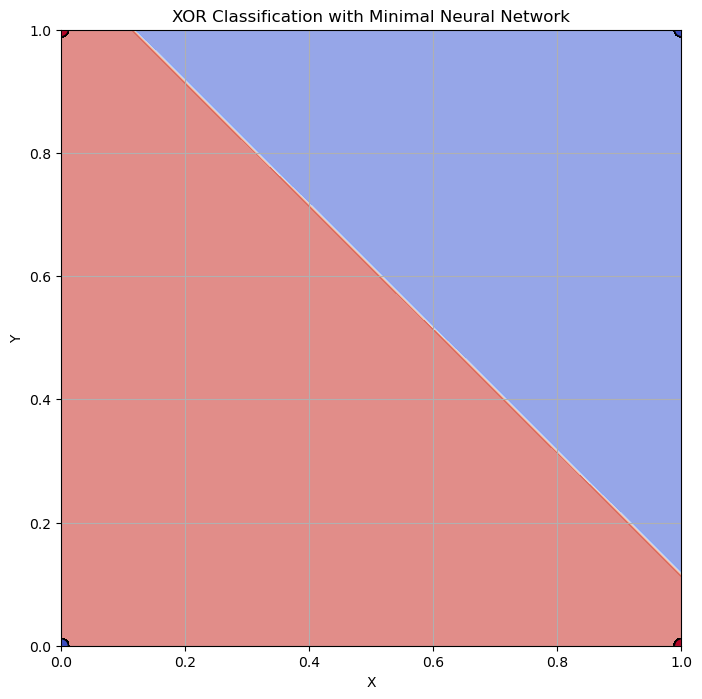

In [8]:
import numpy as np

# Generate a grid of points for visualization
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = model.predict(grid).reshape(xx.shape)

# Visualize the decision boundary and data points
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, grid_pred, alpha=0.6, cmap='coolwarm')
plt.scatter(X['X'], X['Y'], c=y, edgecolor='k', s=100, cmap='coolwarm')
plt.title('XOR Classification with Minimal Neural Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()